[View in Colaboratory](https://colab.research.google.com/github/agerk/dataScience/blob/master/model_eval_python.ipynb)

# Table of contents
- Model Evaluation
- Model Selection
- Ridge Regression
- Grid Search-- Hyperparameter tuning

In [0]:
# Install ipywidgets for interactive visualization
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension --sys-prefix

In [128]:
# Load liberaries

# Data analysis
import pandas as pd
import numpy as np

# Plotting
from IPython.display import display
from IPython.html import widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

print("Done loading!")

Done loading!


In [0]:
# Load autombile data
path='https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv'
df = pd.read_csv(path)

In [130]:
# First model with numeric data 
# Get numeric data
df = df._get_numeric_data()
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
diesel                 int64
gas                    int64
dtype: object

In [0]:
# Function for plotting distribution
def distPlot(red_fn, blue_fn, red_name, blue_name, title):
  """
  Args: function of red and blue, name and title
  Returns: plot disributions
  """
  width, height = 12, 10
  plt.figure(figsize=(width, height))
  
  ax1 = sns.distplot(red_fn, hist=False, color='r', label=red_name)
  ax2 = sns.distplot(blue_fn, hist=False, color='b', label=blue_name, ax=ax1)
  
  plt.title(title)
  plt.xlabel('Price (in dollars)')
  plt.ylabel('Proportion of Cars')
  
  plt.show()
  plt.close
  
# Function for plottig polunomial
def polyPlot(x_train, x_test, y_train, y_test, lr, poly_transform):
  """
  Args: train and test data, model object, and transofrmation
  Returns: plots of train and test data, and prediction
  """
  width, height = 12, 10
  plt.figure(figsize=(width, height))
  
  # Get range of data points
  x_max = max([x_train.values.max(), x_test.values.max()])
  x_min = min([x_train.values.min(), x_test.values.min()])
  x = np.arange(x_min, x_max, 0.1)
  
  # plot
  plt.plot(x_train, y_train, 'ro', label='Training data')
  plt.plot(x_test, y_test, 'go', label='Test data')
  plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), label='Predicted Function')
  plt.ylim([-10000, 60000])
  plt.ylabel('Price')
  plt.legend()

<h3>Training and testing split</h3>

In [132]:
# Load liberary for train and test split
from sklearn.model_selection import train_test_split

y_data =df['price']

# drop price from training data
x_data = df.drop('price', axis=1)

# randomly split data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                   y_data, 
                                                   test_size=0.15,
                                                   random_state=1)
# get number of train and test data
print("number of training samples: ", x_train.shape[0])
print("number of test samples: ", x_test.shape[0])

number of training samples:  170
number of test samples:  31


<h3> Linear model </h3>

In [133]:
# Import LinearRegression module
from sklearn.linear_model import LinearRegression

# create linear regressor object
lre = LinearRegression()
# fit model using 'horsepower' feature
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [134]:
# calculate R-squared on test data
test_r2 = lre.score(x_test[['horsepower']], y_test)
# R-squared from train data
train_r2 = lre.score(x_train[['horsepower']], y_train)

print("R-squared on train is {} and smaller than test R-squared {} ".format(train_r2, test_r2))

R-squared on train is 0.6449517437659684 and smaller than test R-squared 0.707688374146705 


<h3>Cross-validation score</h3>
- when test data is not sufficient, cross-validation is helps for model evaluation.

In [135]:
# Import cross_val_scor from sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict

# perform 4-fold cross validation 
# the defualt scoring is R^2. Each element in the array has 
# the average R-squared value in the fold
r_cross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
r_cross   

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [136]:
# Calculate averag and std of R-squared
print("The mean of the folds are {} and the standard deviation is {}".format(r_cross.mean(), r_cross.std()))

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [137]:
# Predict the output via cross_val_predict
y_hat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
print("sample predicted value", y_hat[0:5])

sample predicted value [14141.63807508 14141.63807508 20814.29423473 12745.03562306
 14762.35027598]


<h2>Model Selection: Overfitting and Underfitting</h2>

- test data also called *the out of sample data*  is a better measure of model performance in real world application 

In [138]:
# Create multiple linear model
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

# predict using train
y_hat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
print("sample prediction using train: ",y_hat_train[0:5])

# predict using test data
y_hat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
print("sample prediction using test: ",y_hat_test[0:5])

sample prediction using train:  [11927.70699817 11236.71672034  6436.91775515 21890.22064982
 16667.18254832]
sample prediction using test:  [11349.16502418  5914.48335385 11243.76325987  6662.03197043
 15555.76936275]


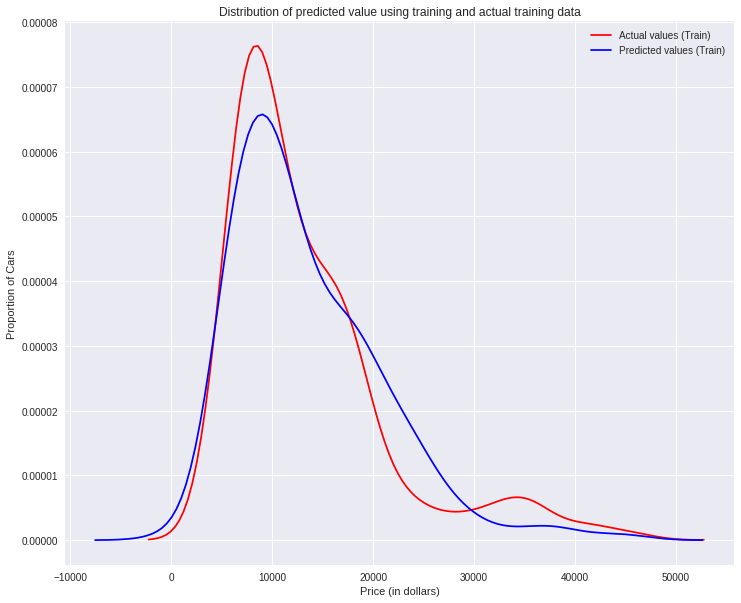

In [139]:
# Perform model evaluation using training and testing data separately
title ='Distribution of predicted value using training and actual training data'
distPlot(y_train, y_hat_train, "Actual values (Train)", "Predicted values (Train)", title)

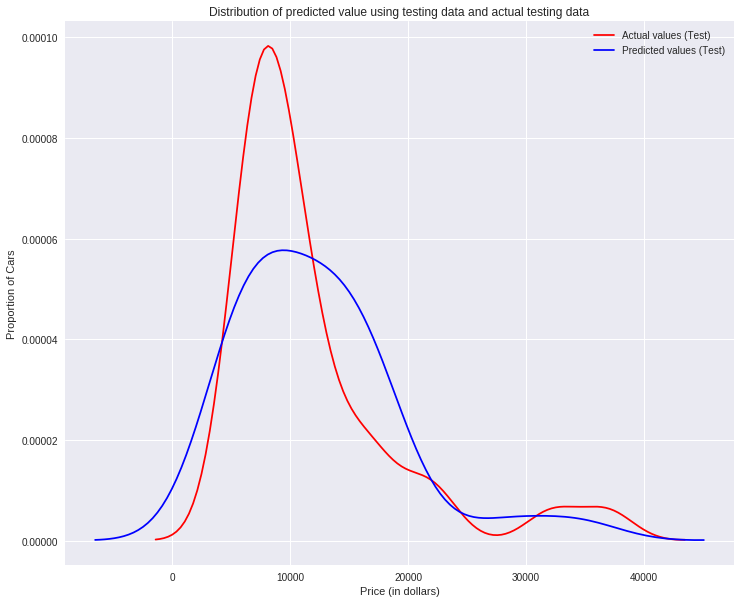

In [140]:
# Perform model evaluation using training and testing data separately
title ='Distribution of predicted value using testing data and actual testing data'
distPlot(y_test, y_hat_test, "Actual values (Test)", "Predicted values (Test)", title)

The two distribution plots shows there is a drop in accuracy on the testing data

Let's see if the same issue arises if we add crossed feaures using polynomical regression

In [0]:
from sklearn.preprocessing import PolynomialFeatures

# Split data into new set--55% of the data for testing
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_data, y_data, test_size=0.55, random_state=0)


In [142]:
# Create a 5th degree polnomial transformation on the 'horsepower' feature
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train_2[['horsepower']])
x_test_pr = pr.fit_transform(x_test_2[['horsepower']])

# Create linear regression model using the poly features
lr_poly = LinearRegression()
lr_poly.fit(x_train_pr, y_train_2)

# predict
y_hat_2 = lr_poly.predict(x_test_pr)

# Compare sample actual vs predicted value
print("Predicted values: ", y_hat_2[0:4])
print("Actual values: ", y_test_2[0:4].values)

Predicted values:  [ 6441.63149709  7052.89040859 12145.78578642 18348.86580864]
Actual values:  [ 6295. 10698. 13860. 13499.]


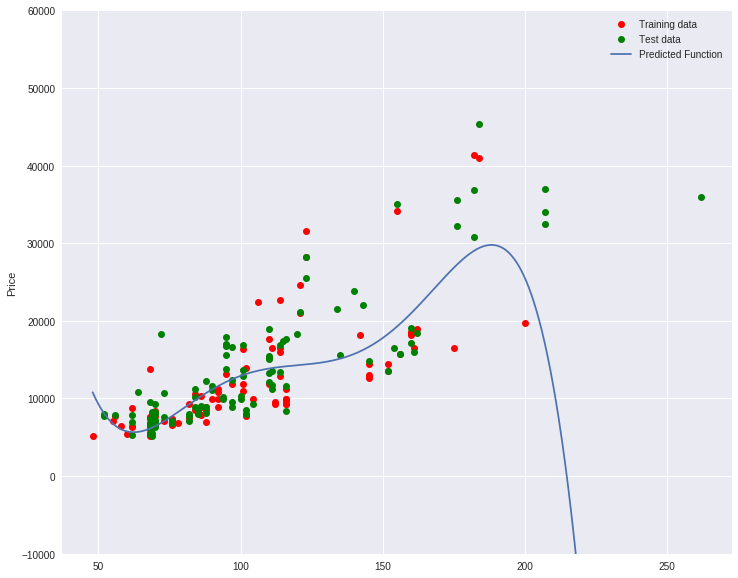

In [143]:
# Plot trainang, testing, and predicted distributions
polyPlot(x_train_2[['horsepower']], x_test_2[['horsepower']], y_train_2, y_test_2, lr_poly, pr)

The model fits well the data at the around 100 hoursepower, but start diverging at the larger horsepower. 

Let's see R-squared

In [144]:
# R-squared
print("R-squared on training data: ",lr_poly.score(x_train_pr, y_train_2))
print("R-squared on testing data: ",lr_poly.score(x_test_pr, y_test_2))

R-squared on training data:  0.5682646621503102
R-squared on testing data:  -38.235733599697376


R-squared on test data is negative and its a sign of **overfitting**

order 2 max R^2 0.7076382887305913


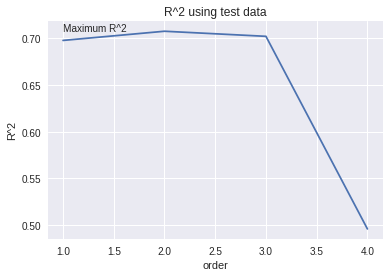

In [145]:
# Examine hot R-squared varies on the test data for differnt oreder of polynomials

r_sqr_test = []
order = [1, 2, 3, 4]

# loop through nth order
for n in order:
  pr=PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train_2[['horsepower']])
  x_test_pr = pr.fit_transform(x_test_2[['horsepower']])
  lr_poly.fit(x_train_pr, y_train_2)
  r_sqr_test.append(lr_poly.score(x_test_pr, y_test_2))
#   print()
r2 = pd.DataFrame(r_sqr_test)
# print("r2:",r2[0].max())
print("order {} max R^2 {}".format((1+r2[0].idxmax()), r2[0].max(axis=0)))
plt.plot(order, r_sqr_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 using test data')
plt.text((pd.DataFrame(r_sqr_test)).idxmax(), (pd.DataFrame(r_sqr_test)).max(), 'Maximum R^2')
plt.show()

In [0]:
# Create interface to expirment with different polynomial orders and different amount of data
def fn(order, test_data):
  """
  Args: polynomial order and size of test data
  Returns: plots 
  """
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
  pr=PolynomialFeatures(degree=order)
  x_train_pr=pr.fit_transform(x_train[['horsepower']])
  x_test_pr=pr.fit_transform(x_test[['horsepower']])
  poly=LinearRegression()
  poly.fit(x_train_pr,y_train)
  polyPlot(x_train[['horsepower']],x_test[['horsepower']],y_train,y_test,poly,pr)


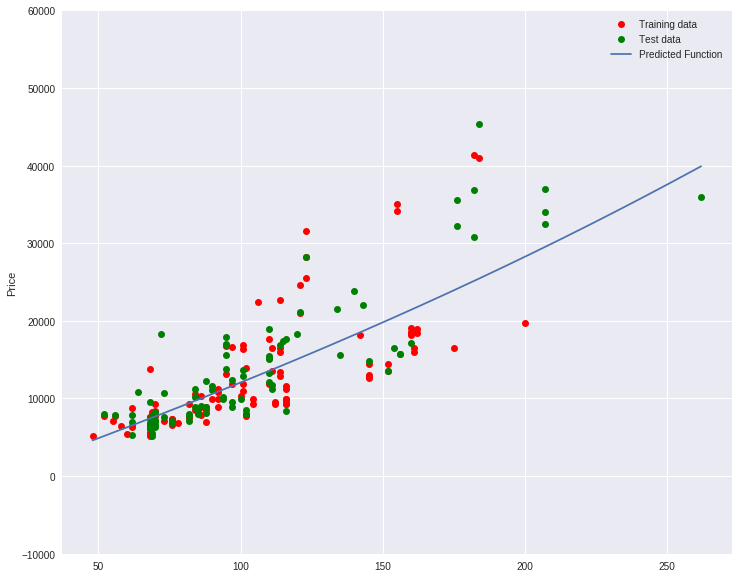

<function __main__.fn>

In [147]:
interact(fn, order=(0,6,1),test_data=(0.05,0.95,0.05))   # ipywidget is not working

<h2>Ridge Regression</h2>
- used as a regularizer by reducing high order polynomial coefficients 
- linear least square `l2` regulizer

In [0]:
from sklearn.linear_model import Ridge
# perform polynomial transformation-- feature crossing
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train_2[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

# create ridge regression 
ridge_model = Ridge(alpha=0.1)
# fit model
ridge_model.fit(x_train_pr, y_train_2)
# predict
y_hat_ridge = ridge_model.predict(x_test_pr)

In [155]:
# compare first five predicted sample
print('predicted: ', y_hat_ridge[0:4])
print('test value', y_test_2[0:4].values)

predicted:  [ 9120.49916834  7705.37308706 10397.59923487  5382.17738103]
test value [ 6295. 10698. 13860. 13499.]


In [0]:
# Select value of alpha that minimizes the test error
r_sqr_test = []
r_sqr_train = []
dummy_1 = []
ALFA = 5000*np.array(range(0, 10000))

for alpha in ALFA:
  ridge_model = Ridge(alpha=alpha)
  ridge_model.fit(x_train_pr, y_train_2)
  r_sqr_test.append(ridge_model.score(x_test_pr, y_test))
  r_sqr_train.append(ridge_model.score(x_train_pr, y_train_2))

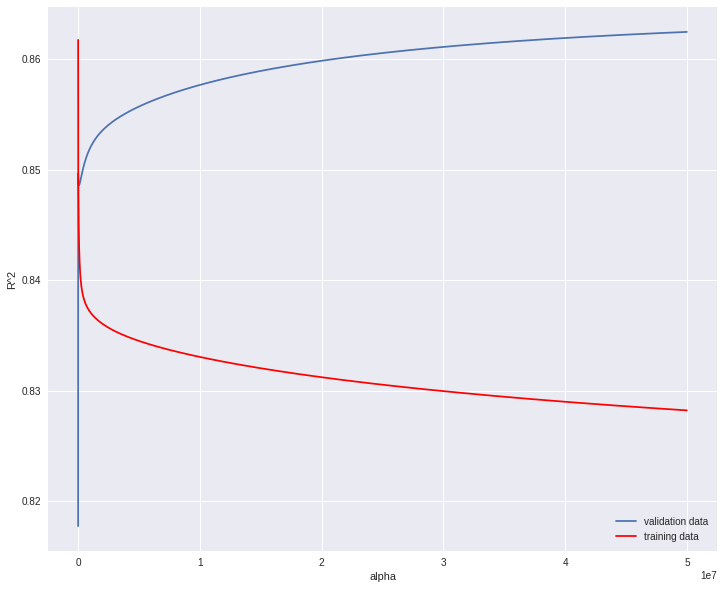

In [161]:
# plot value of R-squared for different value of alpha
width, height = 12,10
plt.figure(figsize=(width, height))

plt.plot(ALFA, r_sqr_test, label='validation data')
plt.plot(ALFA, r_sqr_train,'r', label='training data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

<h2>Grid Search</h2>

- it is used for hyperparameter tuning

In [0]:
from sklearn.model_selection import GridSearchCV

In [164]:
# Ridge object
ridge_reg = Ridge()
# create a dict of parameter values
param_1 = [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000]}]
# create gride search object
grid_1 = GridSearchCV(ridge_reg, param_1, cv=4)
# fit mode
grid_1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [165]:
# find the best parameter 
best_param = grid_1.best_estimator_
best_param

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [167]:
# test model grid_1 on test data
best_param.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8254766467385014

In [172]:
# grid search for alpha nad normalization parameter
param_2 = [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]}]
grid_2 = GridSearchCV(ridge_reg, param_2, cv=2)
grid_2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
best_param_2 = grid_2.best_estimator_
print(best_param_2)
# test grid_2 
best_param_2.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)


0.8205078913208559

*This tutorial was inspired by IMB Applied Data Science course on Coursera*